# **CUSTOMER CHURN PREDICTION**

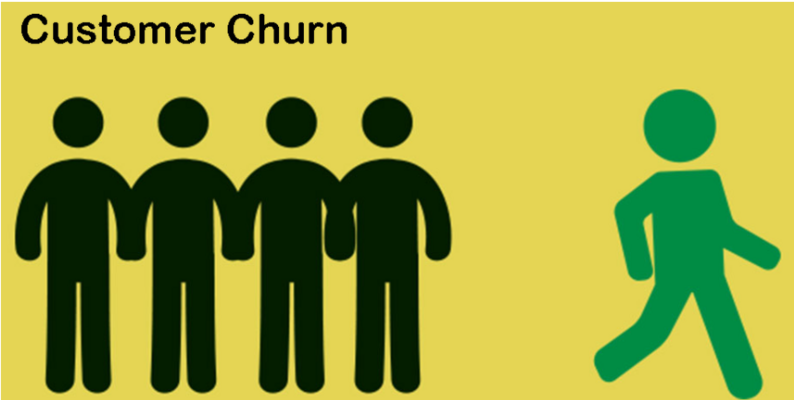

### **IMPORTING NECESSERY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### **LOADING THE DATASET**

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### **PRINTING FIRST 5 ROWS OF THE DATASET**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **PRINTING LAST 5 ROWS OF THE DATASET**

In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### **LISTING THE COLUMNS**

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### **THE DIMENSIONS**

In [ ]:
df.shape

(10000, 14)

### **SOME INFORMATIONS OF THE DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### **CHECKING FOR MISSING VALUES**

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* ***No missing values found***



### **CHECKING FOR DUPLICATE VALUES**

In [ ]:
df.duplicated().sum()

0

* ***No Duplicate values found***

### **CHECKING THE VALUES IN OBJECT COLUMNS**

In [ ]:
for ob_cols in df.columns:
  if df[ob_cols].dtype=='object' or df[ob_cols].dtype=='bool':
    print(f'{ob_cols}: {df[ob_cols].unique()}')

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']




 *  **The column "Surname" seems to have unique values. The values do not seem to contribute much to the target prediction.**

*  **Confirming to remove the column "Surname". ***



### **CHECKING THE VALUES IN NUMERICAL COLUMNS**

In [ ]:
for nums in df.columns:
  if df[nums].dtype=='int64' or df[nums].dtype=='float64':
    print(f'{nums}: {df[nums].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 68

**Confirms to remove columns Row number and customer id.**

**Reason: Irrelevent for Target Prediction**


### **REMOVING IRRELEVENT COLUMNS**

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

### **SOME STATISTICAL OBSERVATIONS OF THE DATA**

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **REFORMATING AND RENAMING CATEGORICAL COLUMNS FOR VISUALIZATIONS**

In [ ]:
df['HasCrCard'] = df['HasCrCard'].astype(str)
df['IsActiveMember'] = df['IsActiveMember'].astype(str)
df['Exited'] = df['Exited'].astype(str)

In [ ]:
df['HasCrCard']=df['HasCrCard'].str.replace('0','No')
df['HasCrCard']=df['HasCrCard'].str.replace('1','Yes')
df['IsActiveMember'] = df['IsActiveMember'].str.replace('0','No')
df['IsActiveMember'] = df['IsActiveMember'].str.replace('1','Yes')
df['Exited'] = df['Exited'].str.replace('0','No')
df['Exited'] = df['Exited'].str.replace('1','Yes')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


### **SPLITTING CATEGORICAL VARIABLES AND CONTINUOUS VARIABLES**

In [ ]:
categorical_variables = df[['Geography','Gender','HasCrCard','NumOfProducts','IsActiveMember']]
Continuous_variables = df[['CreditScore','Age','Balance','Tenure','EstimatedSalary']]

## **VISUALISATION**


### **Categorical Variable Analysis**

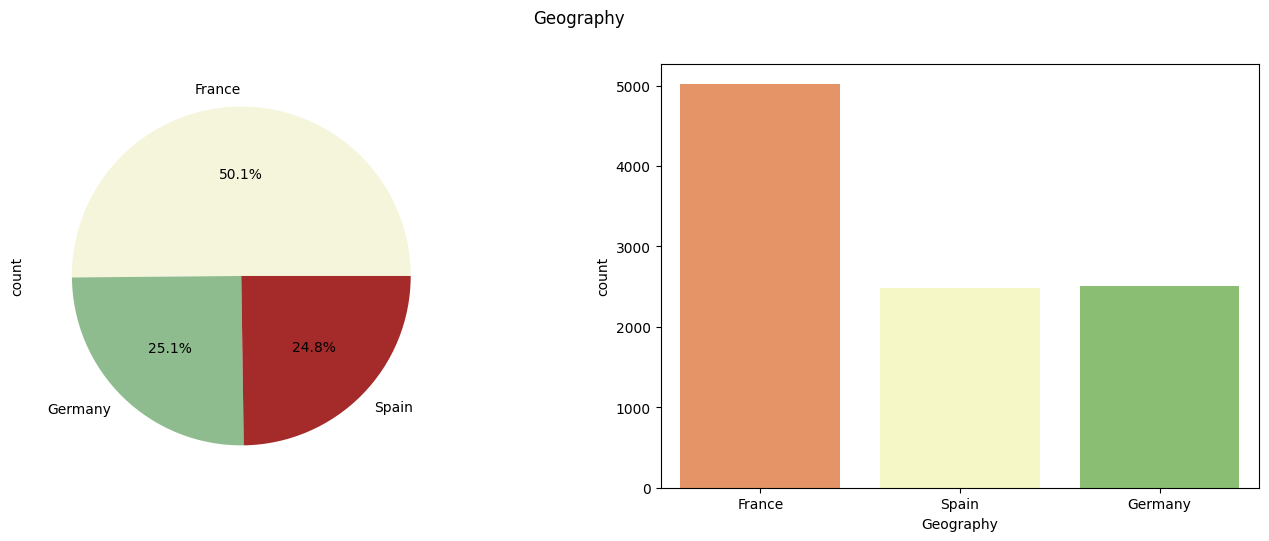

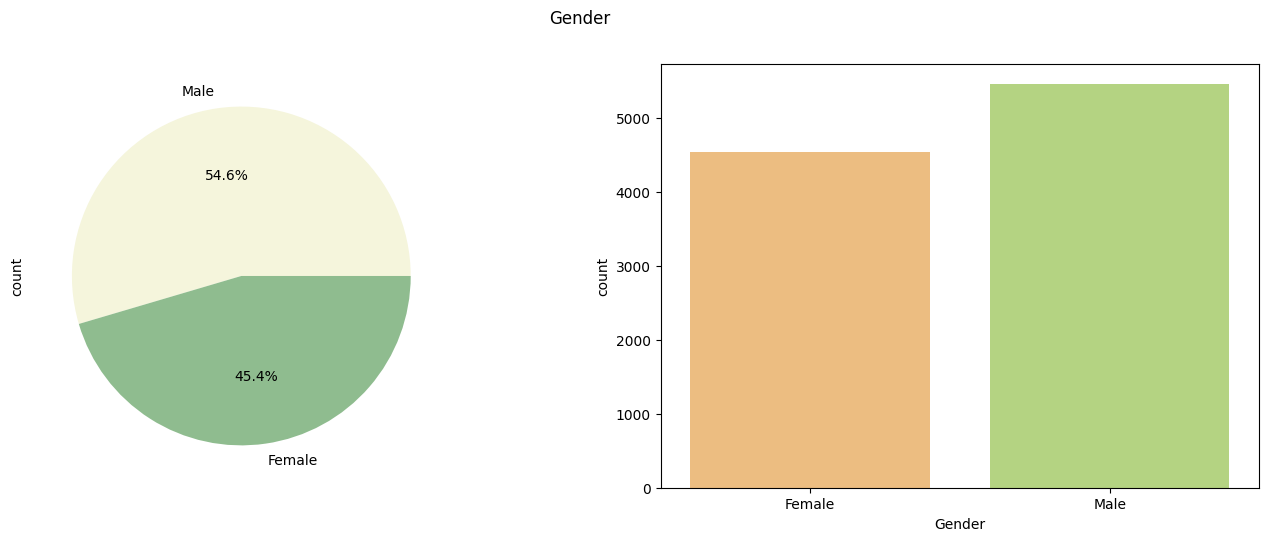

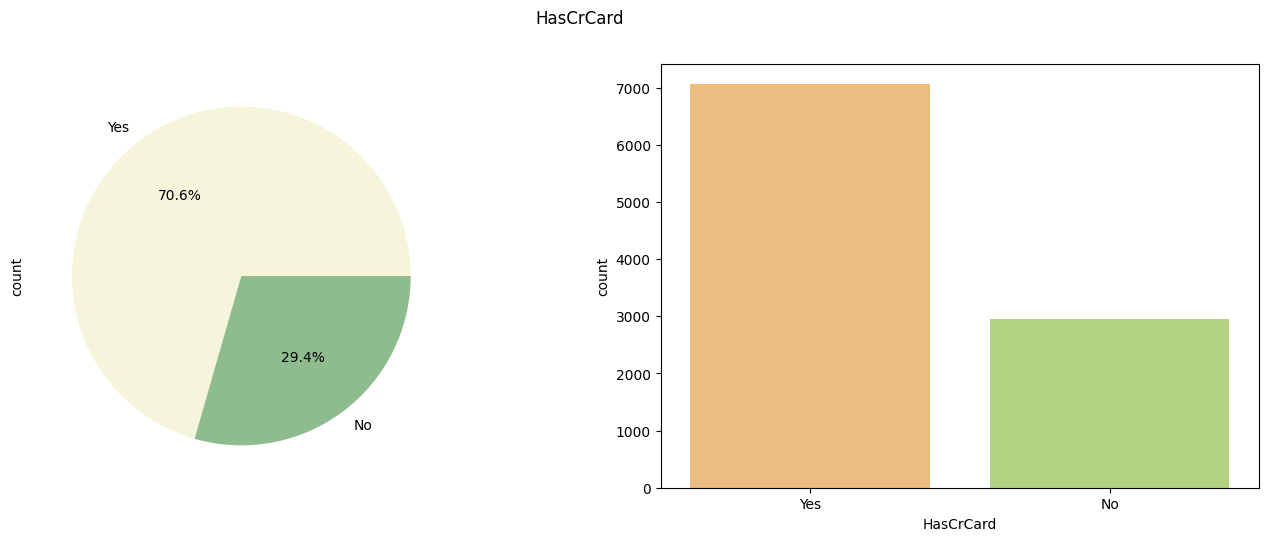

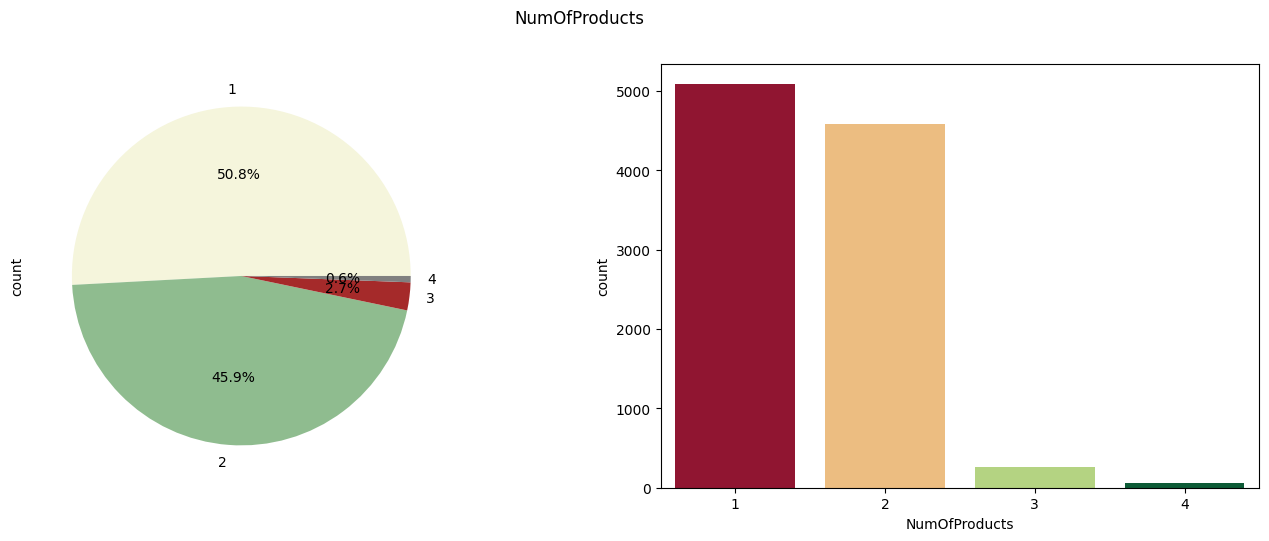

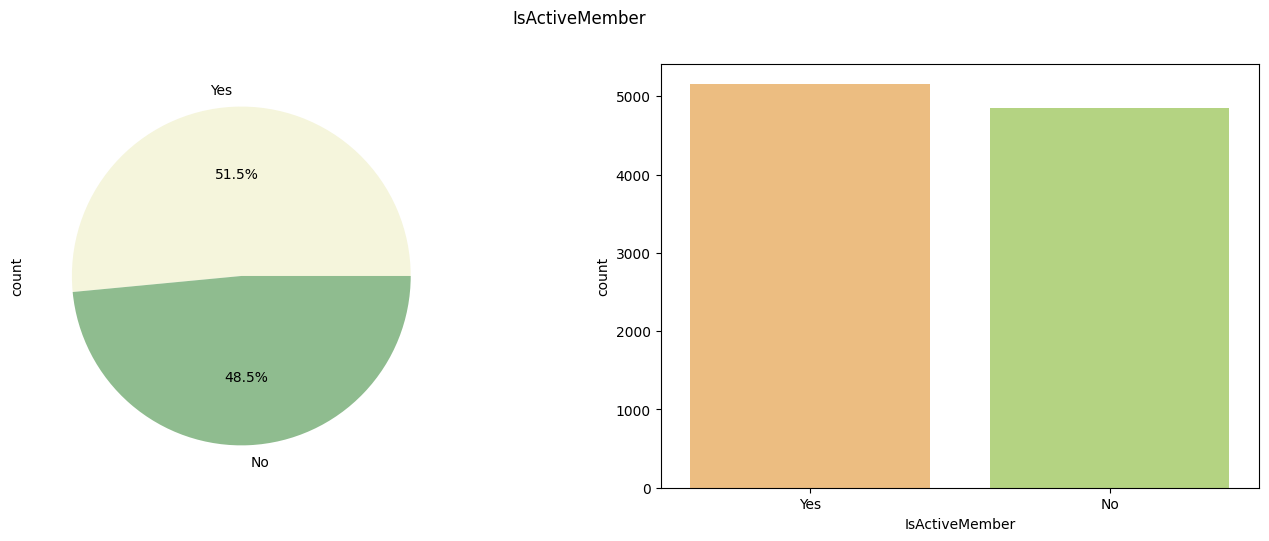

In [ ]:
for column in categorical_variables:
    f,ax=plt.subplots(1,2,figsize=(17,5.5))
    categorical_variables[column].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',colors=['#F5F5DC', '#8FBC8F', '#A52A2A', 'gray'])
    sns.countplot(x=column,data=df,ax=ax[1],hue=column,legend=False,palette='RdYlGn')
    plt.suptitle(f'{column}')
    plt.show()

***Geography*** : **More than Half of the Banks Customers are french (50.1%).Spain and germany hold almost equal proportions of customers.**
***Gender*** : **Male ratio(54.6%)  appears slightly higher than women(45.4%).**                                                                                       
***HasCrCard*** : **Most of the customers does possess credit cards.**         
***IsActiveMember*** : **Equal Proportions in Yes and No categories**

### **Continuous Variable Analysis**

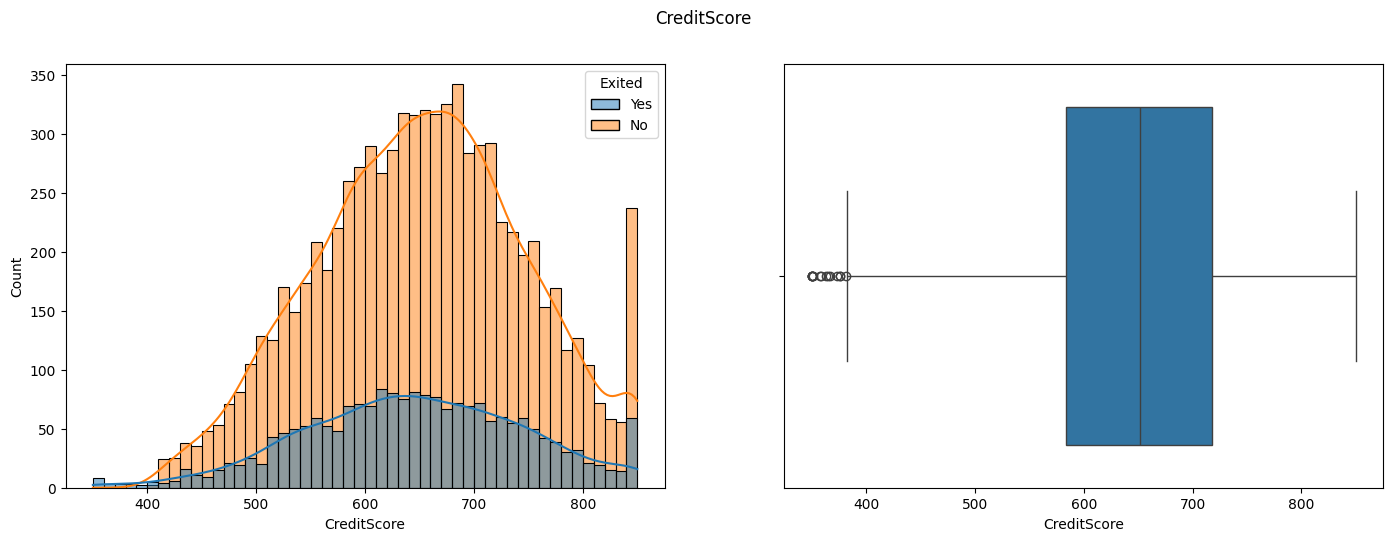

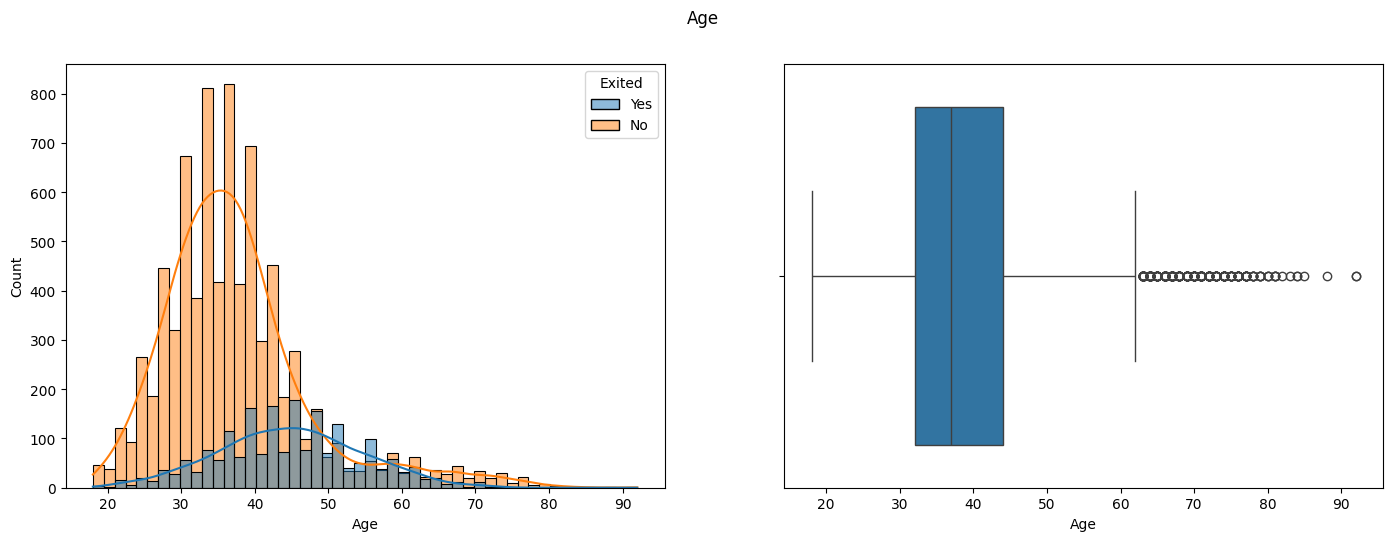

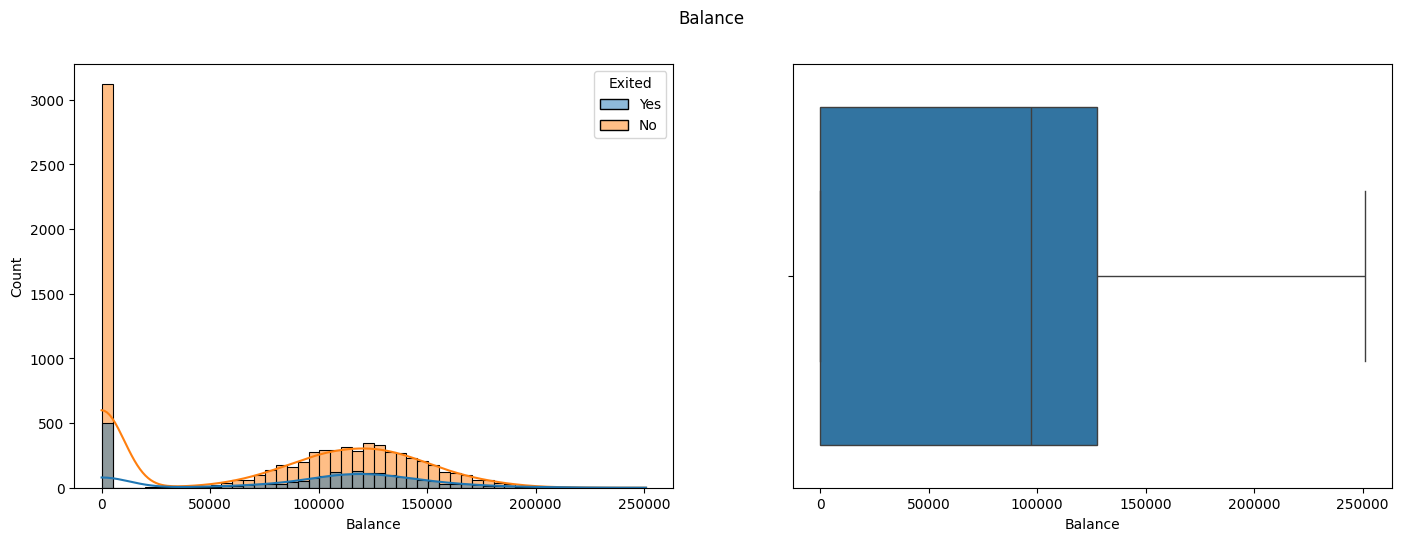

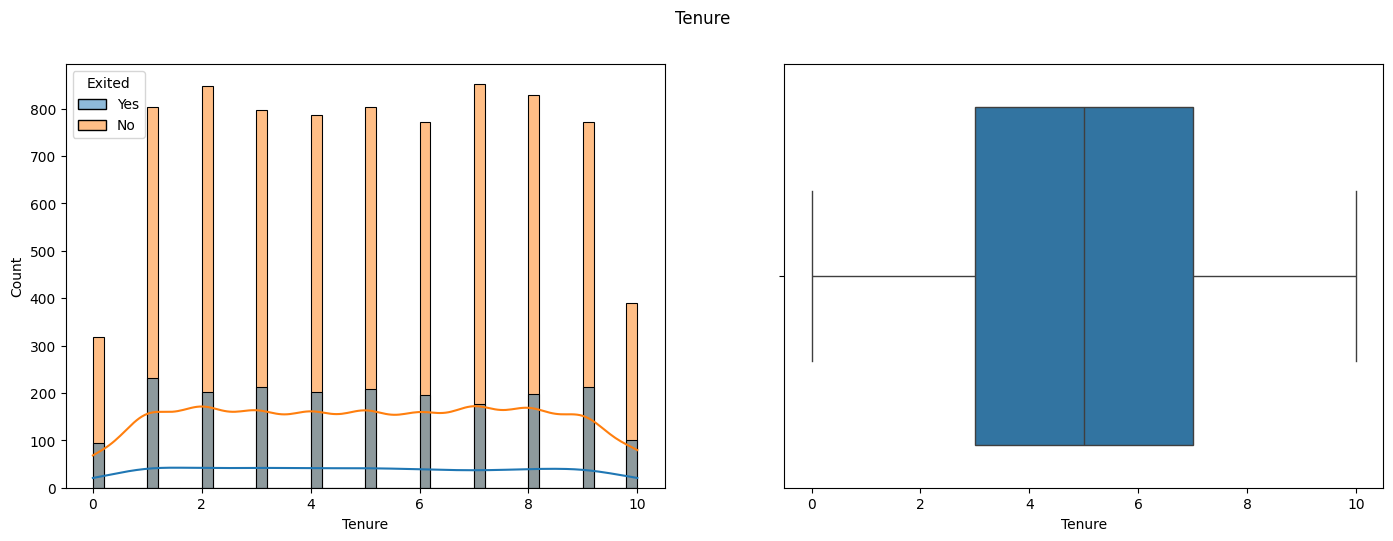

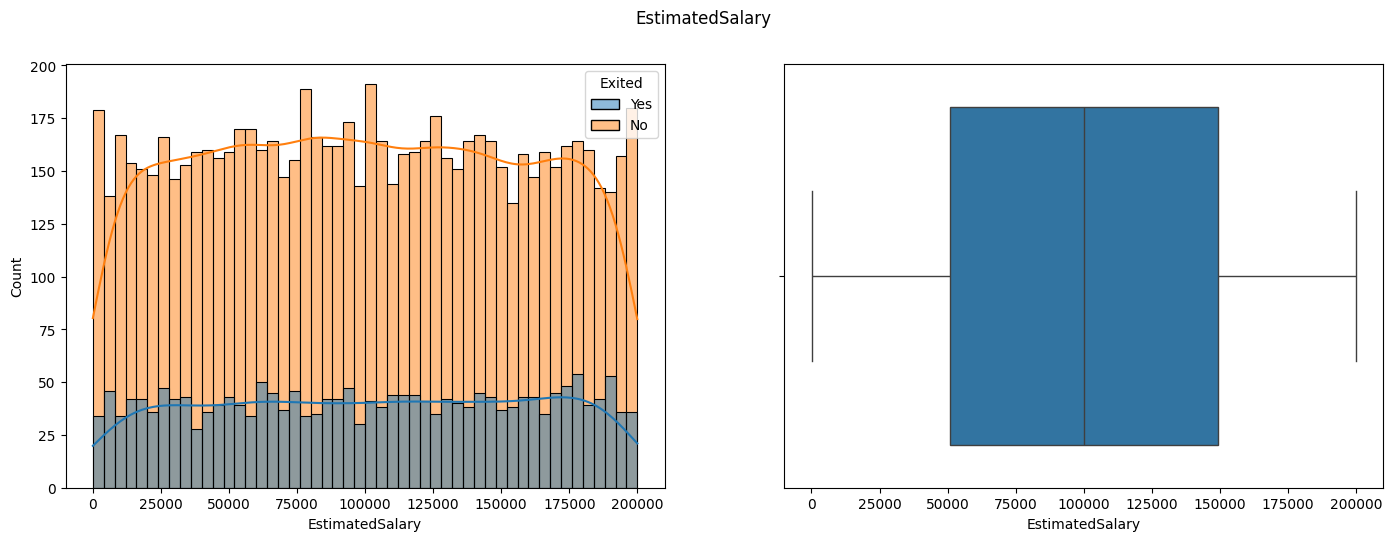

In [ ]:
for column in Continuous_variables:
    f,ax=plt.subplots(1,2,figsize=(17,5.5))
    sns.histplot(ax=ax[0], x=column, hue="Exited",data=df, bins=50, kde=True)
    sns.boxplot(ax=ax[1],x=Continuous_variables[column])
    plt.suptitle(f'{column}')
    plt.show()

### **Target Variable Analysis**

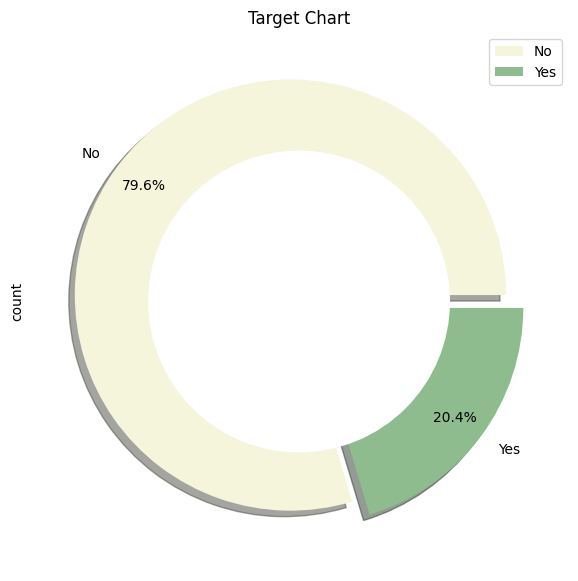

In [ ]:
plt.figure(figsize=(7,7))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%',pctdistance=0.85,explode=[0.05,0.05],shadow=True,colors=['#F5F5DC', '#8FBC8F'])
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc="upper right")
plt.title("Target Chart")
plt.show()

* **The ratio of the target variable exhibits an Imbalance**

### **ENCODING CATEGORICAL VALUES**


*  **Using LabelEncoder for Encoding**



In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df.columns:
  if df[i].dtype =='object':
     df[i]=encoder.fit_transform(df[i])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### **VIEWING THE CORRELEATION BETWEEN COLUMN VALUES**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


### **VISUALIZING THE CORRELEATION THROUGH HEATMAP**

<Axes: >

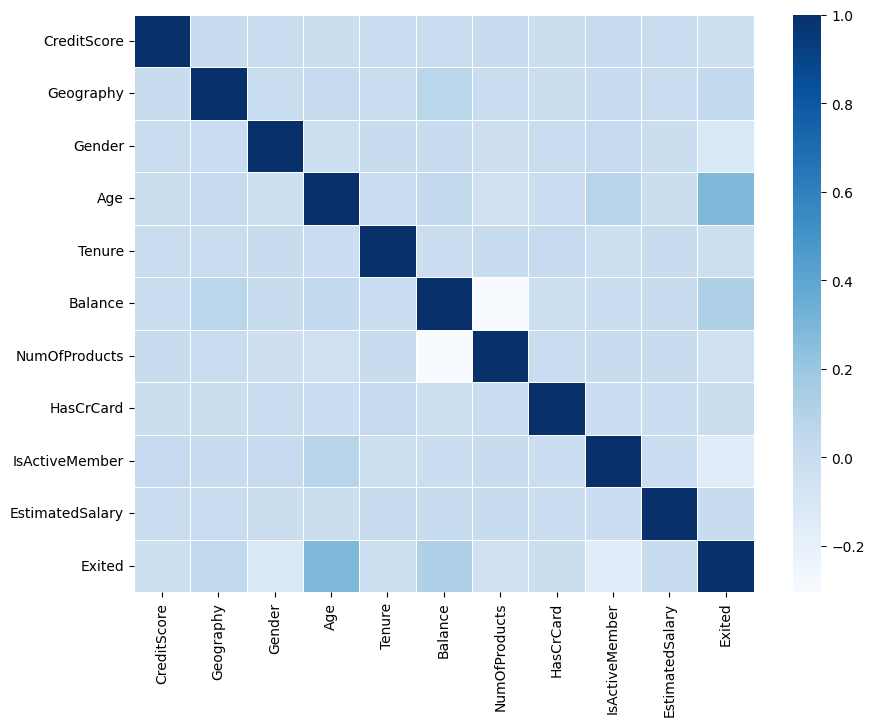

In [ ]:
plt.figure(figsize=(10,7.5))
sns.heatmap(df.corr(),linewidth=0.7,cmap='Blues')

### **CHECKING FOR OUTLIERS**

* **Using boxplot to detect the Outliers**

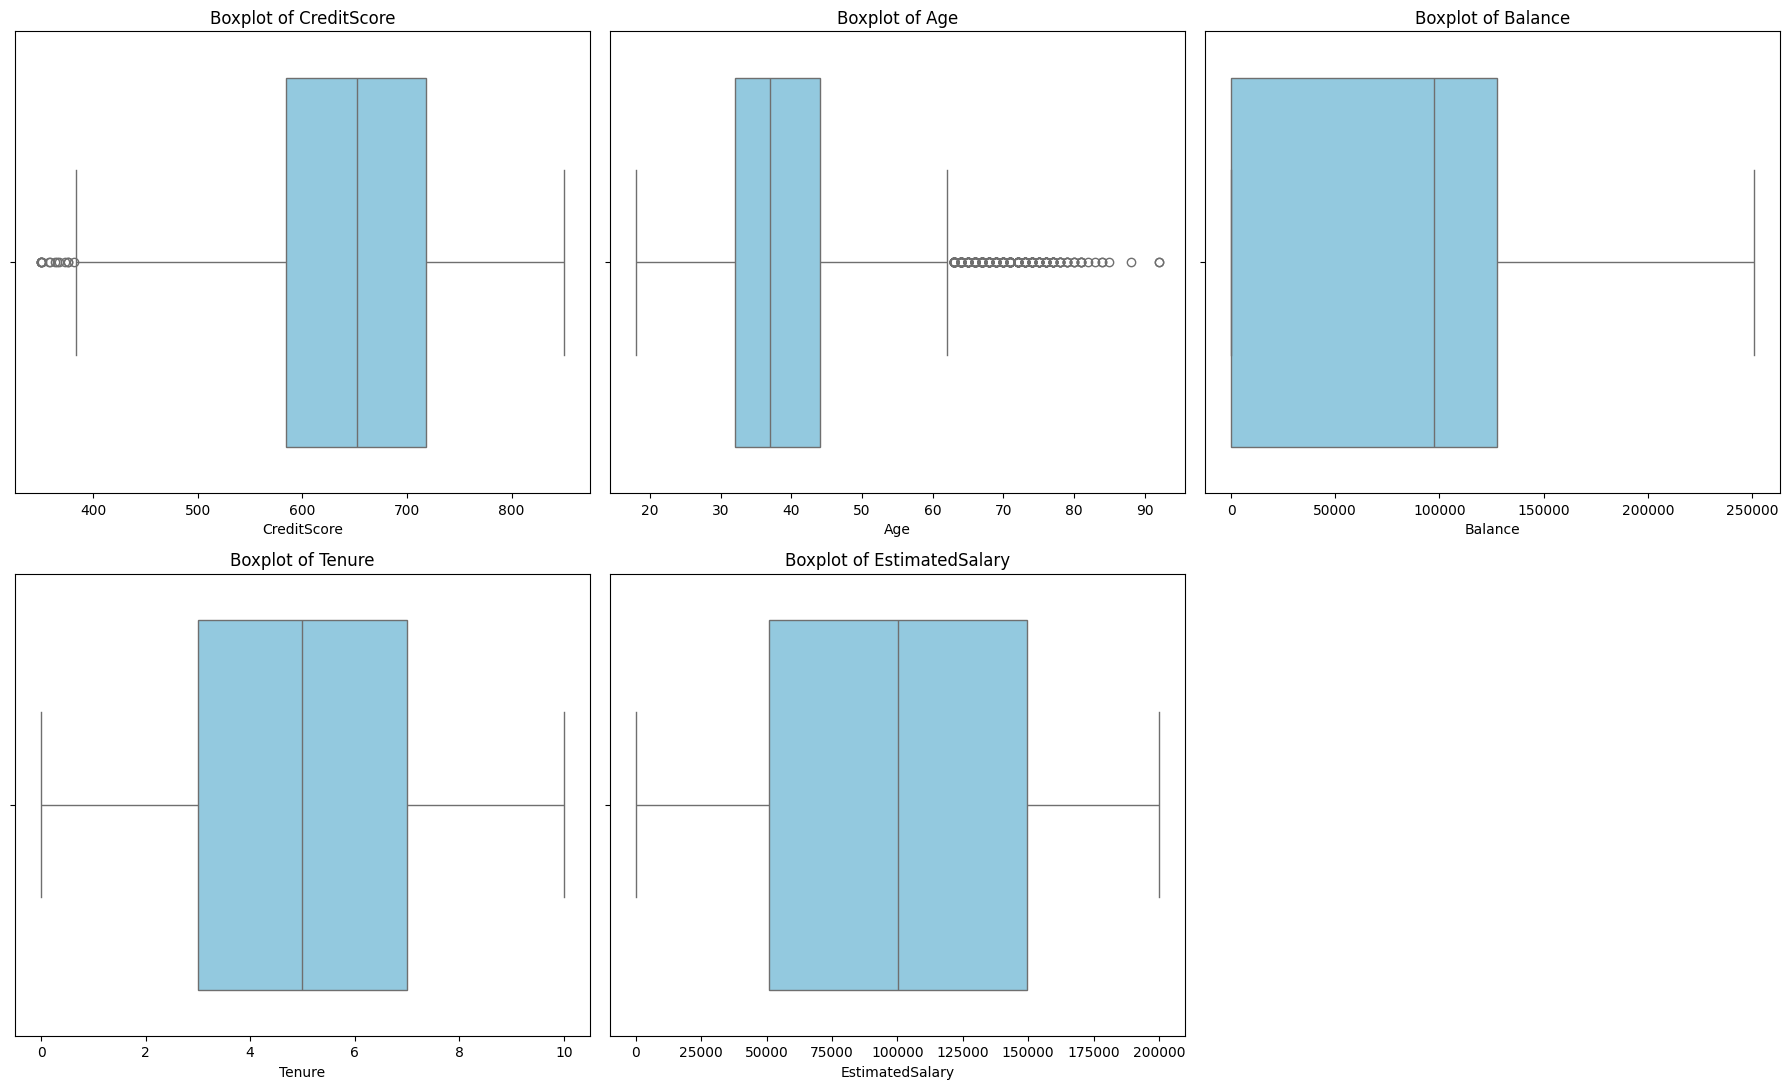

In [ ]:
plt.figure(figsize=(18,11))
for i,j in zip(range(1,6),Continuous_variables):
  plt.subplot(2,3,i)
  sns.boxplot(x=df[j],data=df,color='skyblue')
  plt.tight_layout()
  plt.title("Boxplot of {}".format(j))

*  **Outliers found in columns "CreditScore" and "Age"**




### **REMOVING OUTLIERS**
* **Using IQR method to remove the Outliers**

In [ ]:
Q1=df['CreditScore'].quantile(0.25)
Q3=df['CreditScore'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df['CreditScore']=np.clip(df['CreditScore'],lower_limit,upper_limit)

In [ ]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df['Age']=np.clip(df['Age'],lower_limit,upper_limit)

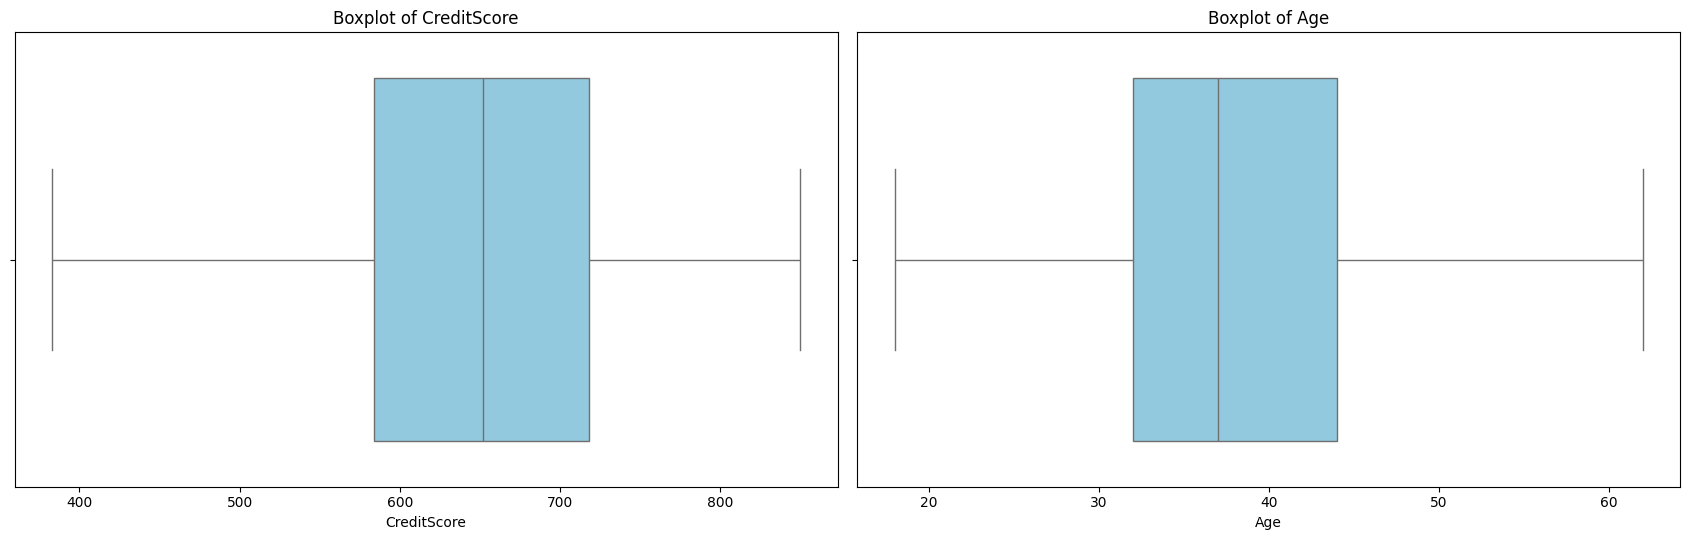

In [ ]:
plt.figure(figsize=(17,5.5))
for i,j in zip(range(1,3),df[['CreditScore','Age']]):
  plt.subplot(1,2,i)
  sns.boxplot(x=df[j],data=df,color='skyblue')
  plt.tight_layout()
  plt.title("Boxplot of {}".format(j))

### **PARTITIONING DATASET INTO INPUT AND TARGET**

In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

### **VISUALIZING THE IMBALANCE WITHIN THE TARGET VARIABLE**

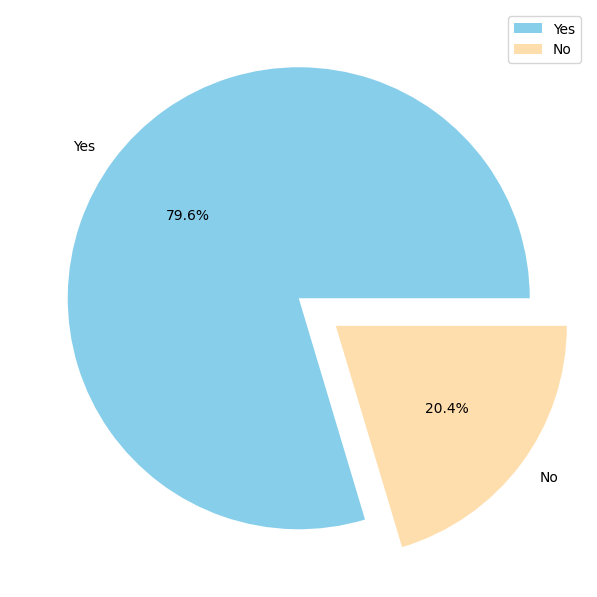

In [ ]:
count=y.value_counts()
label=['Yes','No']
my_explode=[0,0.2]
plt.figure(figsize=(10,7.5))
plt.pie(count,labels=label,autopct='%1.1f%%',colors=['skyblue','navajowhite'],explode=my_explode)
plt.legend(loc='upper right')

### **FIXING THE IMBALANCE USING OVERSAMPLING**
* **Choosing SMOTE as the Sampler.**

In [ ]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
X,Y=sampler.fit_resample(x,y)
print("Orginal test set shape:",Counter(y))
print("Resampled test set shape:",Counter(Y))

Orginal test set shape: Counter({0: 7963, 1: 2037})
Resampled test set shape: Counter({1: 7963, 0: 7963})


### **TRAINING AND TESTING PARTITION**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6428,627,1,0,39,5,124586.930000,1,1,0,93132.610000
9992,726,2,1,36,2,0.000000,1,1,0,195192.400000
12320,728,1,0,45,0,141003.619947,1,0,0,169706.501571
5896,744,2,1,30,1,128065.120000,1,1,0,121525.480000
11840,626,1,0,48,2,119414.149708,1,0,0,131876.423457
...,...,...,...,...,...,...,...,...,...,...
13418,607,0,0,42,8,95701.542960,2,0,0,131661.330418
5390,735,0,0,38,1,0.000000,3,0,0,92220.120000
860,667,0,1,43,8,190227.460000,1,1,0,97508.040000
15795,632,0,0,38,1,124670.501077,2,1,0,57849.176848


### **NORMALIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.23087259,  0.43354688, -0.84203895, ...,  0.78344184,
        -0.76904791, -0.13249092],
       [ 0.85766161,  1.75048982,  1.18759352, ...,  0.78344184,
        -0.76904791,  1.63831695],
       [ 0.8796522 ,  0.43354688, -0.84203895, ..., -1.27641893,
        -0.76904791,  1.196119  ],
       ...,
       [ 0.20893921, -0.88339606,  1.18759352, ...,  0.78344184,
        -0.76904791, -0.05657418],
       [-0.17589612, -0.88339606, -0.84203895, ...,  0.78344184,
        -0.76904791, -0.74468286],
       [ 0.53879806,  0.43354688,  1.18759352, ...,  0.78344184,
         1.3003091 , -0.81873625]])

### **MODEL CREATION AND PERFORMANCE EVALUATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
knn_model=KNeighborsClassifier(n_neighbors=7)
log_model=LogisticRegression(multi_class='auto',solver='newton-cg')
Nb_model=GaussianNB()
dt_model=DecisionTreeClassifier(criterion='entropy')
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
model_names=["KNeighborsClassifier","LogisticRegression","GaussianNB","DecisionTreeClassifier","RandomForestClassifier"]
a_models=[knn_model,log_model,Nb_model,dt_model,rf_model]
lst_score=[]

In [ ]:
for i in a_models:
  print("Model:",i)
  print('-'*150)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  mat=confusion_matrix(y_test,y_pred)
  score=accuracy_score(y_test,y_pred)
  lst_score.append(score)
  print("Accuracy score:",score)
  print("Model Evaluation Result:")
  print(classification_report(y_test,y_pred))
  print("="*150)

Model: KNeighborsClassifier(n_neighbors=7)
------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score: 0.8126831310171619
Model Evaluation Result:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2426
           1       0.79      0.84      0.81      2352

    accuracy                           0.81      4778
   macro avg       0.81      0.81      0.81      4778
weighted avg       0.81      0.81      0.81      4778

Model: LogisticRegression(solver='newton-cg')
------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score: 0.7773126831310172
Model Evaluation Result:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      2426
           1       0.76      0.79      0.78      2352

In [ ]:
lst_score

[0.8126831310171619,
 0.7773126831310172,
 0.8082879866052741,
 0.797614064462118,
 0.8595646714106321]

In [ ]:
models_df=pd.DataFrame({"Model":model_names,"Accuracy score":lst_score})
best_models=models_df.sort_values(by='Accuracy score',ascending=False)
best_models

,Model,Accuracy score
4,RandomForestClassifier,0.859565
0,KNeighborsClassifier,0.812683
2,GaussianNB,0.808288
3,DecisionTreeClassifier,0.797614
1,LogisticRegression,0.777313


Text(0, 0.5, 'Accuracy Score')

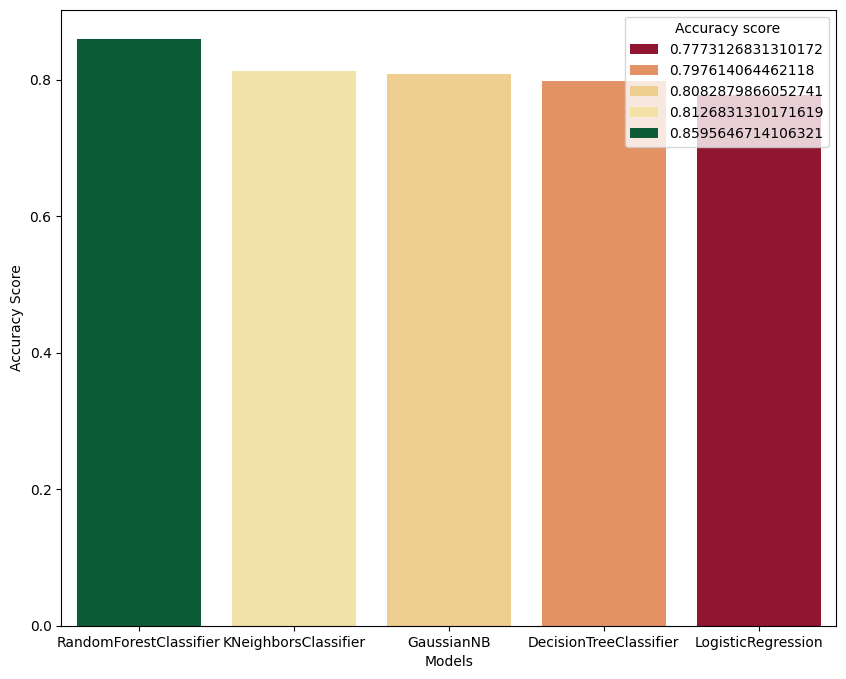

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=best_models['Model'],y=best_models['Accuracy score'],hue=best_models['Accuracy score'],data=best_models,palette='RdYlGn')
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

### The Best Model is RandomForestClassifier

Accuracy score :**0.859146**